In [1]:
from math import exp
import numpy
import random
import pandas as pd
from classes import Matrix
import matplotlib.pyplot as plt
import seaborn as sns

# learning rate
ALFA = 0.1

# species
species = {'Iris-setosa':[0,0,1], 'Iris-versicolor':[0,1,0], 'Iris-virginica':[1,0,0]}

# one neuron per class of plant
NEURON_MAX_NUMBER = 3

# all properties in use
PROPERTIES = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] 

def step_function(wn:list, x:list, b:float) -> int:
    f = 0   
    for property_index in range(len(wn)):
        f += wn[property_index]*x[property_index]
    f += b
    if f <= 0:
        return 0
    else:
        return 1

def sigmoid_function(wn:list, x:list, b:float) -> float:
    f = 0
    for property_index in range(len(wn)):
        f += wn[property_index]*x[property_index]
    f += b
    return 1/(1+exp(-f))

def sigmoid_output_handler(y:list) -> list:
    greater = max(y)
    for i in range(len(y)):
        if y[i] == greater:
            y[i] = 1
        else:
            y[i] = 0
    return y

def get_random_index(vector:list) -> int:
    first = 0
    last = len(vector)
    chosen_index = random.randrange(first, last)
    chosen = vector.pop(chosen_index)
    return chosen

In [2]:
io_base = pd.DataFrame(pd.read_csv('Iris_Data.csv'))

# target arrey d values recovered from IO
d = []

# heuristic output
y = []

# d - y
z = []

# recover species from base
setosa_base = io_base.loc[io_base['species'] == "Iris-setosa"]
versicolor_base = io_base.loc[io_base['species'] == "Iris-versicolor"]
virginica_base = io_base.loc[io_base['species'] == "Iris-virginica"]

# recover training base
setosa_training = setosa_base.sample(frac=0.7,random_state=50)
versicolor_training = versicolor_base.sample(frac=0.7,random_state=50)
virginica_training = virginica_base.sample(frac=0.7,random_state=50)
training_base = [setosa_training, versicolor_training, virginica_training]
training_base = pd.concat(training_base)
training_base = training_base.reset_index()

# recover test base
setosa_test = setosa_base.drop(setosa_training.index)
versicolor_test = versicolor_base.drop(versicolor_training.index)
virginica_test = virginica_base.drop(virginica_training.index)
test_base = [setosa_test, versicolor_test, virginica_test]
test_base = pd.concat(test_base)

In [3]:
######################################################################################
# step function
print('step function')

# Epoch error per neuron
E_current = [0 for x in range(NEURON_MAX_NUMBER)]
E_past = [1 for x in range(NEURON_MAX_NUMBER)]
E_history = []

# bias for all neurons
b = [random.random() for x in range(len(PROPERTIES))]

# weights
w = Matrix()
for i in range(NEURON_MAX_NUMBER):
    w.insert_row([random.random() for x in range(len(PROPERTIES))])
min_interactions = 2
while E_past[0] > E_current[0] or E_past[1] > E_current[1] or E_past[2] > E_current[2] or min_interactions: #after set train base

    # set a seed vetor for random access
    index_vector = [x for x in range(len(training_base))]

    while len(index_vector) > 0:
        rand_index = get_random_index(index_vector)
        row = training_base.iloc[rand_index]

        # find d
        for key in species.keys():
            if row.loc['species'] == key:
                d = species[key]

        # recover input
        x = []
        for property in PROPERTIES:
            x.append(row.loc[property])

        # calculate y
        y = []
        for i in range(w.get_size_rows()):
            y.append(step_function(w.get_row(i),x,b[i]))

        # find error z = d - y
        z = numpy.subtract(d,y)

        # find new weights, bias and E's
        for i in range(w.get_size_rows()):
            # wnm = wnm + a*zn*(xm)^T
            wi = w.get_row(i)
            wi = numpy.add(wi, numpy.multiply(ALFA*z[i],x))
            w.set_row(i, wi)

            # bn = bn + a*zn
            b[i] = b[i] + ALFA*z[i]

    # find epoch error after training
    for i in range(w.get_size_rows()):
        # En = En + (zn*(zn)^T)
        E_past[i] = E_current[i]
        E_current[i] = E_past[i] + z[i]*z[i]

    # epoch register
    E_history.append(E_current)

    # min_interactions beat down
    min_interactions -= 1

# test step model
# set a seed vetor for random access
index_vector = [x for x in range(len(training_base))]

# test
hit = 0
while len(index_vector) > 0:
    rand_index = get_random_index(index_vector)
    row = training_base.iloc[rand_index]

    # find d
    for key in species.keys():
        if row.loc['species'] == key:
            d = species[key]

    # recover input
    x = []
    for property in PROPERTIES:
        x.append(row.loc[property])

    # calculate y
    y = []
    for i in range(w.get_size_rows()):
        y.append(step_function(w.get_row(i),x,b[i]))

    if y == d:
        # acertoh miseravi
        hit += 1

# calculate hit rate
miss = len(training_base) - hit
hit_rate = hit/(hit+miss)
print('hit_rate: {:.2f}'.format(hit_rate*100))

step function
hit_rate: 45.71


C:\Users\user\AppData\Local\Temp\ipykernel_8720\3715954967.py:12: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot_date(timeline, double_error, linestyle='-', marker=None)


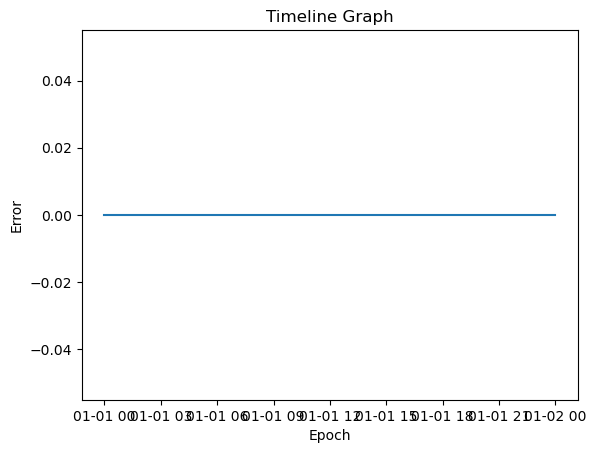

In [9]:
# step epoch graph
fig, ax = plt.subplots()
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Timeline Graph')
for i in range(NEURON_MAX_NUMBER):
    timeline = []
    double_error = []
    for h in range(len(E_history)):
        timeline.append(h)
        double_error.append(E_history[h][i])
    ax.plot_date(timeline, double_error, linestyle='-', marker=None)
    plt.show()

In [ ]:
# sigmoid function
print('sigmoid function')

# Epoch error per neuron
E_current = [0 for x in range(NEURON_MAX_NUMBER)]
E_past = [1 for x in range(NEURON_MAX_NUMBER)]
E_history = []

# bias for all neurons
b = [random.random() for x in range(len(PROPERTIES))]

# weights
for i in range(w.get_size_rows()):
    for j in range(w.get_size_columns()):
        w.set_item(i,j,random.random())

min_interactions = 2
while E_past[0] > E_current[0] or E_past[1] > E_current[1] or E_past[2] > E_current[2] or min_interactions: #after set train base
    # set a seed vetor for random access
    index_vector = [x for x in range(len(training_base))]

    while len(index_vector) > 0:
        rand_index = get_random_index(index_vector)
        row = training_base.iloc[rand_index]

        # find d
        for key in species.keys():
            if row.loc['species'] == key:
                d = species[key]

        # recover input
        x = []
        for property in PROPERTIES:
            x.append(row.loc[property])

        # calculate y
        y = []
        for i in range(w.get_size_rows()):
            y.append(sigmoid_function(w.get_row(i),x,b[i]))
        sigmoid_output_handler(y)

        # find error z = d - y
        z = numpy.subtract(d,y)

        # find new weights, bias and E's
        for i in range(w.get_size_rows()):
            # wnm = wnm + a*zn*(xm)^T
            wi = w.get_row(i)
            wi = numpy.add(wi, numpy.multiply(ALFA*z[i],x))
            w.set_row(i, wi)

            # bn = bn + a*zn
            b[i] = b[i] + ALFA*z[i]

    # find epoch error after training
    for i in range(w.get_size_rows()):
        # En = En + (zn*(zn)^T)
        E_past[i] = E_current[i]
        E_current[i] = E_past[i] + z[i]*z[i]

    # epoch register
    E_history.append(E_current)

    # min_interactions beat down
    min_interactions -= 1

# test step model
# set a seed vetor for random access
index_vector = [x for x in range(len(training_base))]

# test
hit = 0
while len(index_vector) > 0:
    rand_index = get_random_index(index_vector)
    row = training_base.iloc[rand_index]

    # find d
    for key in species.keys():
        if row.loc['species'] == key:
            d = species[key]

    # recover input
    x = []
    for property in PROPERTIES:
        x.append(row.loc[property])

    # calculate y
    y = []
    for i in range(w.get_size_rows()):
        y.append(sigmoid_function(w.get_row(i),x,b[i]))
    sigmoid_output_handler(y)

    if y == d:
        # acertoh miseravi
        hit += 1

# calculate hit rate
miss = len(training_base) - hit
hit_rate = hit/(hit+miss)
print('hit_rate: {:.2f}'.format(hit_rate*100))

In [ ]:
# sigmoid epoch graph